In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the currency pairs to load
ticker = ['EURUSD', 'GBPUSD', 'AUDUSD']

# Create an empty dictionary to store DataFrames
dfs = {}

# Read CSV files for each currency pair
for pair in ticker:
    try:
        # Files are named like EURUSD_1day_D1.csv
        file_path = f"{pair}_1day_D1.csv"
        
        # Read the CSV file with no headers
        df = pd.read_csv(file_path, header=None, 
                         names=['Date', 'Time', 'Open', 'High', 'Low', 'Close', 'Volume'])
        
        # Combine Date and Time columns to create a datetime index
        df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
        df = df.set_index('Datetime')
        
        # Drop the original Date and Time columns
        df = df.drop(['Date', 'Time'], axis=1)
        
        # Store in dictionary
        dfs[pair] = df
        
    except FileNotFoundError:
        print(f"Warning: CSV file for {pair} not found")

# Create a multi-level DataFrame
data = pd.concat({pair: df for pair, df in dfs.items()}, axis=1)

# Check if data was loaded successfully
if len(data) == 0:
    print("Warning: No data was loaded from CSV files")
elif 'Close' not in data.columns.get_level_values(1) and isinstance(data.columns, pd.MultiIndex):
    print("Warning: Close data not available in the loaded dataset")
    print("Available columns:", data.columns.get_level_values(1).unique())


In [3]:
data = data.dropna()
# Drop the Volume columns from the MultiIndex DataFrame
# Since data has a MultiIndex with (Ticker, Price) levels, we need to drop all Volume columns
data = data.drop('Volume', axis=1, level=1)
data



EURUSD                              GBPUSD                    \
               Open     High      Low    Close     Open     High      Low   
Datetime                                                                    
2020-01-01  1.12120  1.12218  1.12106  1.12188  1.32463  1.32608  1.32457   
2020-01-02  1.12188  1.12245  1.11635  1.11708  1.32497  1.32661  1.31152   
2020-01-03  1.11707  1.11798  1.11249  1.11548  1.31466  1.31600  1.30531   
2020-01-05  1.11656  1.11677  1.11589  1.11604  1.30808  1.30855  1.30633   
2020-01-06  1.11603  1.12055  1.11571  1.11954  1.30767  1.31785  1.30638   
...             ...      ...      ...      ...      ...      ...      ...   
2025-06-11  1.14375  1.15129  1.14052  1.15099  1.35073  1.35724  1.34639   
2025-06-12  1.15102  1.16311  1.15017  1.16084  1.35672  1.36302  1.35226   
2025-06-13  1.16083  1.16143  1.14890  1.15457  1.36280  1.36320  1.35163   
2025-06-15  1.15309  1.15469  1.15256  1.15376  1.35577  1.35607  1.35373   
2025-06-16  1.15376  1.16147  1.15238  1.15534  1.35487  1.36220  1.35342   

                      AUDUSD                             
              Close     Open     High      Low    Close  
Datetime                                                 
2020-01-01  1.32497  0.70137  0.70192  0.70048  0.70182  
2020-01-02  1.31467  0.70188  0.70195  0.69782  0.69829  
2020-01-03  1.30787  0.69828  0.69862  0.69299  0.69456  
2020-01-05  1.30768  0.69416  0.69445  0.69322  0.69432  
2020-01-06  1.31711  0.69432  0.69574  0.69250  0.69364  
...             ...      ...      ...      ...      ...  
2025-06-11  1.35673  0.65286  0.65455  0.64956  0.65083  
2025-06-12  1.36282  0.65084  0.65332  0.64768  0.65267  
2025-06-13  1.35671  0.65266  0.65268  0.64559  0.64821  
2025-06-15  1.35484  0.64801  0.64937  0.64759  0.64915  
2025-06-16  1.35681  0.64916  0.65516  0.64661  0.65119  

[1705 rows x 12 columns]

/var/folders/36/c0bhb5797fjg386rxmn_xsx40000gn/T/ipykernel_61756/891777392.py:8: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eurusd_pct_change = eurusd_close.pct_change().dropna()
/var/folders/36/c0bhb5797fjg386rxmn_xsx40000gn/T/ipykernel_61756/891777392.py:9: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  gbpusd_pct_change = gbpusd_close.pct_change().dropna()


Total number of trades: 409
Total profit: 236.58%
Average trade duration: 92.12 days
Maximum drawdown: -17.27%
Sharpe ratio: 0.53
Annualized Sharpe ratio: 4.38

Trades per year:
year
2020    92
2021    80
2022    73
2023    72
2024    65
2025    27
dtype: int64

Profit per year:
year
2020    55.523817
2021    20.426566
2022    57.744389
2023    44.476197
2024    41.870068
2025    16.542680
Name: total_profit_pct, dtype: float64


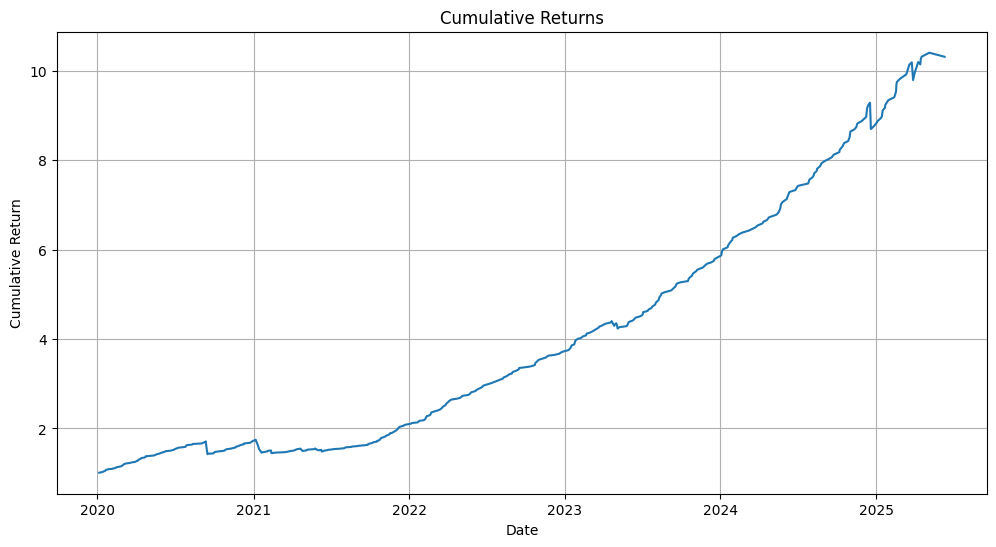

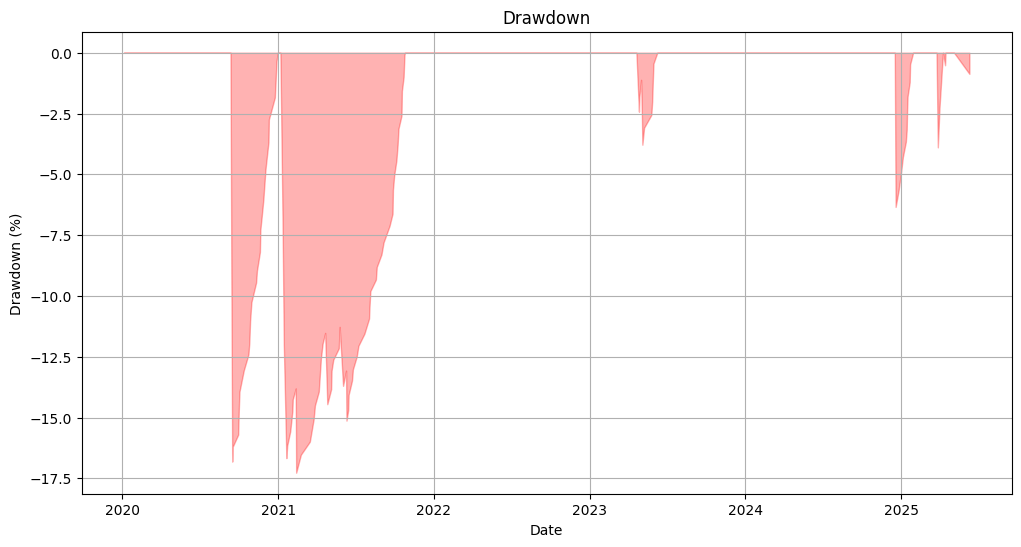

,entry_date,exit_date,duration_days,buy_pair,sell_pair,entry_buy_price,exit_buy_price,entry_sell_price,exit_sell_price,buy_profit_pct,sell_profit_pct,total_profit_pct
0,2020-01-05,2020-01-08,3,GBPUSD,EURUSD,1.30768,1.31051,1.11604,1.11129,0.216414,0.553296,0.769709
1,2020-01-10,2020-01-22,12,GBPUSD,EURUSD,1.30569,1.31435,1.11165,1.10957,0.663251,0.243242,0.906493
2,2020-01-13,2020-01-16,3,GBPUSD,EURUSD,1.29859,1.30760,1.11344,1.11368,0.693829,-0.028021,0.665808
3,2020-01-14,2020-03-01,47,EURUSD,GBPUSD,1.11275,1.10515,1.30211,1.28038,-0.887890,1.668830,0.780939
4,2020-01-16,2020-02-28,43,EURUSD,GBPUSD,1.11368,1.10251,1.30760,1.28125,-1.303875,2.015142,0.711267
...,...,...,...,...,...,...,...,...,...,...,...,...
404,2025-04-14,2025-06-16,63,EURUSD,GBPUSD,1.13360,1.15534,1.31719,1.35681,2.493119,-3.007918,-0.514799
405,2025-04-15,2025-04-16,1,EURUSD,GBPUSD,1.12932,1.13953,1.32302,1.32323,1.175309,-0.015873,1.159436
406,2025-04-17,2025-04-20,3,EURUSD,GBPUSD,1.13715,1.14488,1.32675,1.33140,0.883700,-0.350480,0.533220
407,2025-05-05,2025-06-12,38,EURUSD,GBPUSD,1.13120,1.16084,1.32903,1.36282,3.406294,-2.542456,0.863838


In [4]:
# Define a function to calculate daily percentage changes
def calculate_daily_pct_change(data):
    # Get the daily close prices for EURUSD and GBPUSD
    eurusd_close = data['EURUSD']['Close'].resample('D').last()
    gbpusd_close = data['GBPUSD']['Close'].resample('D').last()
    
    # Calculate daily percentage changes
    eurusd_pct_change = eurusd_close.pct_change().dropna()
    gbpusd_pct_change = gbpusd_close.pct_change().dropna()
    
    return pd.DataFrame({
        'EURUSD_pct': eurusd_pct_change,
        'GBPUSD_pct': gbpusd_pct_change
    })

# Calculate daily percentage changes
daily_changes = calculate_daily_pct_change(data)

# Identify trading opportunities based on the strategy
trading_opportunities = daily_changes[
    ((daily_changes['EURUSD_pct'] > 0) & (daily_changes['GBPUSD_pct'] < 0)) | 
    ((daily_changes['EURUSD_pct'] < 0) & (daily_changes['GBPUSD_pct'] > 0))
].copy()

# Add columns to identify which pair to buy and which to sell
trading_opportunities['buy_pair'] = np.where(
    trading_opportunities['EURUSD_pct'] < 0, 'EURUSD', 'GBPUSD'
)
trading_opportunities['sell_pair'] = np.where(
    trading_opportunities['EURUSD_pct'] > 0, 'EURUSD', 'GBPUSD'
)

# Initialize lists to store trade details
trades = []

# Process each trading opportunity
for date, row in trading_opportunities.iterrows():
    # Determine which pair to buy and which to sell
    buy_pair = row['buy_pair']
    sell_pair = row['sell_pair']
    
    # Get entry prices (using the close price of the signal day as entry for next day)
    entry_date = date
    entry_buy_price = data[buy_pair]['Close'].loc[entry_date]
    entry_sell_price = data[sell_pair]['Close'].loc[entry_date]
    
    # Determine position sizes (1.3 for EURUSD, 1 for GBPUSD)
    buy_size = 1.3 if buy_pair == 'EURUSD' else 1.0
    sell_size = 1.3 if sell_pair == 'EURUSD' else 1.0
    
    # Find exit date and prices (when combined profit reaches 0.5%)
    # Start from the next day
    next_day_idx = data.index.get_indexer([entry_date])[0] + 1
    exit_date = None
    exit_buy_price = None
    exit_sell_price = None
    
    for i in range(next_day_idx, len(data.index)):
        current_date = data.index[i]
        current_buy_price = data[buy_pair]['Close'].loc[current_date]
        current_sell_price = data[sell_pair]['Close'].loc[current_date]
        
        # Calculate profit/loss for each position
        buy_profit_pct = (current_buy_price - entry_buy_price) / entry_buy_price * 100 * buy_size
        sell_profit_pct = (entry_sell_price - current_sell_price) / entry_sell_price * 100 * sell_size
        
        total_profit_pct = buy_profit_pct + sell_profit_pct
        
        if total_profit_pct >= 0.5:
            exit_date = current_date
            exit_buy_price = current_buy_price
            exit_sell_price = current_sell_price
            break
    
    # If we didn't find an exit point, use the last available price
    if exit_date is None:
        exit_date = data.index[-1]
        exit_buy_price = data[buy_pair]['Close'].loc[exit_date]
        exit_sell_price = data[sell_pair]['Close'].loc[exit_date]
    
    # Calculate profit/loss for each position
    buy_profit_pct = (exit_buy_price - entry_buy_price) / entry_buy_price * 100 * buy_size
    sell_profit_pct = (entry_sell_price - exit_sell_price) / entry_sell_price * 100 * sell_size
    total_profit_pct = buy_profit_pct + sell_profit_pct
    
    # Store trade details
    trades.append({
        'entry_date': entry_date,
        'exit_date': exit_date,
        'buy_pair': buy_pair,
        'sell_pair': sell_pair,
        'entry_buy_price': entry_buy_price,
        'exit_buy_price': exit_buy_price,
        'entry_sell_price': entry_sell_price,
        'exit_sell_price': exit_sell_price,
        'buy_size': buy_size,
        'sell_size': sell_size,
        'buy_profit_pct': buy_profit_pct,
        'sell_profit_pct': sell_profit_pct,
        'total_profit_pct': total_profit_pct,
        'duration_days': (exit_date - entry_date).days  # Calculate trade duration in days
    })

# Convert trades list to DataFrame
trades_df = pd.DataFrame(trades)

# Calculate performance metrics
if len(trades_df) > 0:
    # Calculate total profit
    total_profit = trades_df['total_profit_pct'].sum()
    
    # Calculate average trade duration
    avg_trade_duration = trades_df['duration_days'].mean()
    
    # Calculate annual metrics
    trades_df['year'] = trades_df['entry_date'].dt.year
    trades_per_year = trades_df.groupby('year').size()
    profit_per_year = trades_df.groupby('year')['total_profit_pct'].sum()
    
    # Calculate drawdown
    cumulative_returns = (1 + trades_df['total_profit_pct'] / 100).cumprod()
    peak = cumulative_returns.expanding().max()
    drawdown = (cumulative_returns / peak - 1) * 100
    max_drawdown = drawdown.min()
    
    # Calculate Sharpe ratio correctly (assuming risk-free rate of 0%)
    # Sharpe ratio = (Mean return - Risk free rate) / Standard deviation of returns
    mean_return = trades_df['total_profit_pct'].mean()
    std_return = trades_df['total_profit_pct'].std()
    sharpe_ratio = mean_return / std_return if std_return > 0 else 0
    
    # Calculate annualized Sharpe ratio (assuming 252 trading days per year)
    avg_trades_per_year = len(trades_df) / len(trades_df['year'].unique())
    annualized_sharpe = sharpe_ratio * np.sqrt(avg_trades_per_year)
    
    # Print results
    print(f"Total number of trades: {len(trades_df)}")
    print(f"Total profit: {total_profit:.2f}%")
    print(f"Average trade duration: {avg_trade_duration:.2f} days")
    print(f"Maximum drawdown: {max_drawdown:.2f}%")
    print(f"Sharpe ratio: {sharpe_ratio:.2f}")
    print(f"Annualized Sharpe ratio: {annualized_sharpe:.2f}")
    print("\nTrades per year:")
    print(trades_per_year)
    print("\nProfit per year:")
    print(profit_per_year)
    
    # Plot cumulative returns
    plt.figure(figsize=(12, 6))
    plt.plot(trades_df['entry_date'], cumulative_returns)
    plt.title('Cumulative Returns')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.grid(True)
    plt.show()
    
    # Plot drawdown
    plt.figure(figsize=(12, 6))
    plt.fill_between(trades_df['entry_date'], drawdown, 0, color='red', alpha=0.3)
    plt.title('Drawdown')
    plt.xlabel('Date')
    plt.ylabel('Drawdown (%)')
    plt.grid(True)
    plt.show()
    
    # Display trade details
    display(trades_df[['entry_date', 'exit_date', 'duration_days', 'buy_pair', 'sell_pair', 
                      'entry_buy_price', 'exit_buy_price', 'entry_sell_price', 'exit_sell_price',
                      'buy_profit_pct', 'sell_profit_pct', 'total_profit_pct']])
else:
    print("No trading opportunities found based on the strategy.")


/var/folders/36/c0bhb5797fjg386rxmn_xsx40000gn/T/ipykernel_61756/3585924460.py:8: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eurusd_pct_change = eurusd_close.pct_change().dropna()
/var/folders/36/c0bhb5797fjg386rxmn_xsx40000gn/T/ipykernel_61756/3585924460.py:9: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  audusd_pct_change = audusd_close.pct_change().dropna()


Total number of trades: 457
Total profit: 302.52%
Average trade duration: 58.81 days
Maximum drawdown: -27.26%
Sharpe ratio: 0.48
Annualized Sharpe ratio: 4.19

Trades per year:
year
2020    95
2021    75
2022    83
2023    82
2024    86
2025    36
dtype: int64

Profit per year:
year
2020    78.003813
2021    59.606882
2022    71.502720
2023    34.123531
2024    54.533637
2025     4.753126
Name: total_profit_pct, dtype: float64


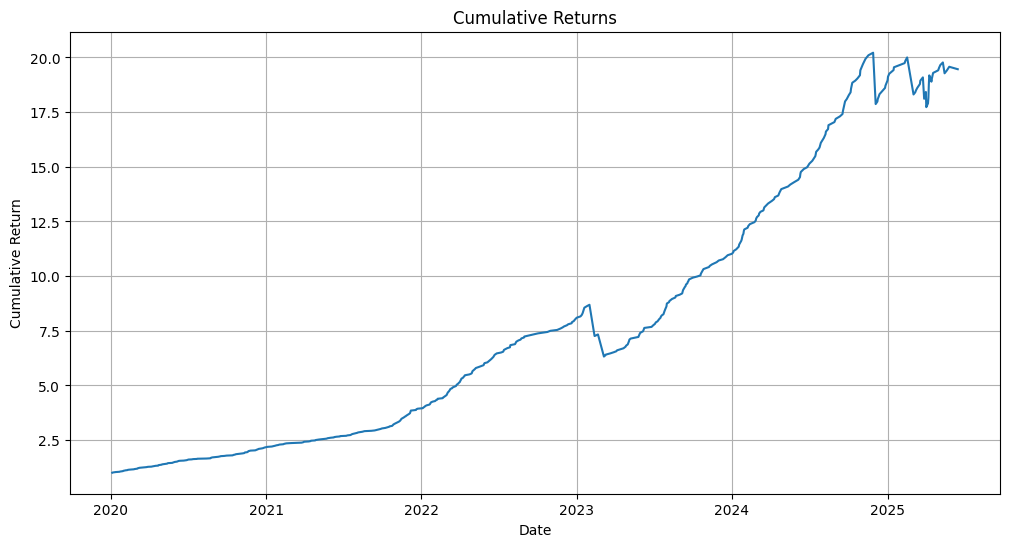

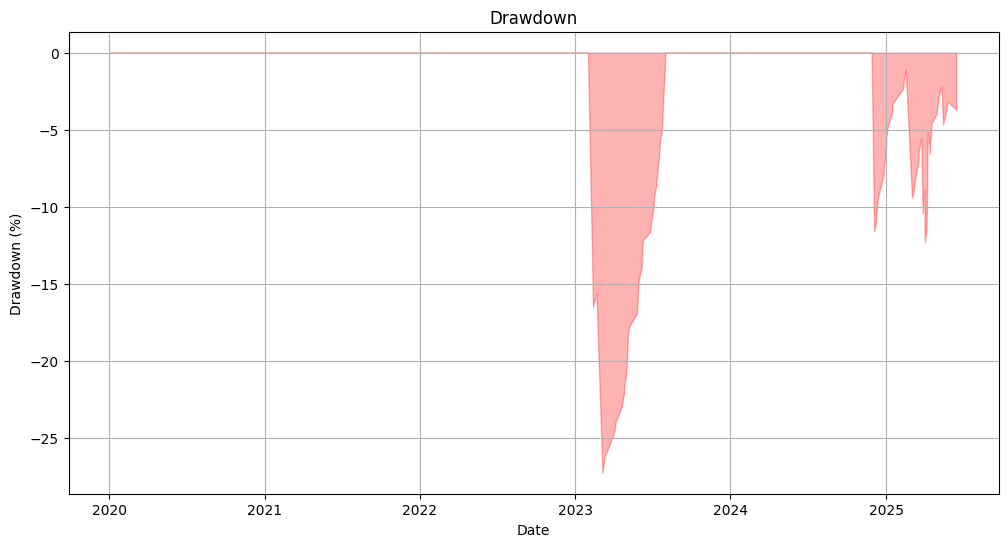

,entry_date,exit_date,duration_days,buy_pair,sell_pair,entry_buy_price,exit_buy_price,entry_sell_price,exit_sell_price,buy_profit_pct,sell_profit_pct,total_profit_pct
0,2020-01-05,2020-02-16,42,AUDUSD,EURUSD,0.69432,0.67252,1.11604,1.08411,-3.139763,3.719311,0.579548
1,2020-01-06,2020-02-13,38,AUDUSD,EURUSD,0.69364,0.67186,1.11954,1.08413,-3.139957,4.111778,0.971821
2,2020-01-08,2020-01-27,19,EURUSD,AUDUSD,1.11129,1.10193,0.68749,0.67614,-1.094944,1.650933,0.555989
3,2020-01-12,2020-01-22,10,EURUSD,AUDUSD,1.11161,1.10957,0.68996,0.68410,-0.238573,0.849325,0.610752
4,2020-01-13,2020-02-13,31,AUDUSD,EURUSD,0.68970,0.67186,1.11344,1.08413,-2.586632,3.422097,0.835465
...,...,...,...,...,...,...,...,...,...,...,...,...
452,2025-05-15,2025-06-16,32,AUDUSD,EURUSD,0.64036,0.65119,1.11918,1.15534,1.691236,-4.200218,-2.508982
453,2025-05-20,2025-05-28,8,AUDUSD,EURUSD,0.64251,0.64219,1.12881,1.12296,-0.049805,0.673718,0.623914
454,2025-05-26,2025-05-28,2,AUDUSD,EURUSD,0.64796,0.64219,1.13883,1.12296,-0.890487,1.811596,0.921109
455,2025-06-11,2025-06-16,5,AUDUSD,EURUSD,0.65083,0.65119,1.15099,1.15534,0.055314,-0.491316,-0.436002


Trade report saved to 'trade_report.csv'


In [5]:
# Define a function to calculate daily percentage changes
def calculate_daily_pct_change(data):
    # Get the daily close prices for EURUSD and AUDUSD
    eurusd_close = data['EURUSD']['Close'].resample('D').last()
    audusd_close = data['AUDUSD']['Close'].resample('D').last()
    
    # Calculate daily percentage changes
    eurusd_pct_change = eurusd_close.pct_change().dropna()
    audusd_pct_change = audusd_close.pct_change().dropna()
    
    return pd.DataFrame({
        'EURUSD_pct': eurusd_pct_change,
        'AUDUSD_pct': audusd_pct_change
    })

# Calculate daily percentage changes
daily_changes = calculate_daily_pct_change(data)

# Identify trading opportunities based on the strategy
trading_opportunities = daily_changes[
    ((daily_changes['EURUSD_pct'] > 0) & (daily_changes['AUDUSD_pct'] < 0)) | 
    ((daily_changes['EURUSD_pct'] < 0) & (daily_changes['AUDUSD_pct'] > 0))
].copy()

# Add columns to identify which pair to buy and which to sell
trading_opportunities['buy_pair'] = np.where(
    trading_opportunities['EURUSD_pct'] < 0, 'EURUSD', 'AUDUSD'
)
trading_opportunities['sell_pair'] = np.where(
    trading_opportunities['EURUSD_pct'] > 0, 'EURUSD', 'AUDUSD'
)

# Initialize lists to store trade details
trades = []

# Process each trading opportunity
for date, row in trading_opportunities.iterrows():
    # Determine which pair to buy and which to sell
    buy_pair = row['buy_pair']
    sell_pair = row['sell_pair']
    
    # Get entry prices (using the close price of the signal day as entry for next day)
    entry_date = date
    entry_buy_price = data[buy_pair]['Close'].loc[entry_date]
    entry_sell_price = data[sell_pair]['Close'].loc[entry_date]
    
    # Determine position sizes (1.3 for EURUSD, 1 for AUDUSD)
    buy_size = 1.3 if buy_pair == 'EURUSD' else 1.0
    sell_size = 1.3 if sell_pair == 'EURUSD' else 1.0
    
    # Find exit date and prices (when combined profit reaches 0.5%)
    # Start from the next day
    next_day_idx = data.index.get_indexer([entry_date])[0] + 1
    exit_date = None
    exit_buy_price = None
    exit_sell_price = None
    
    for i in range(next_day_idx, len(data.index)):
        current_date = data.index[i]
        current_buy_price = data[buy_pair]['Close'].loc[current_date]
        current_sell_price = data[sell_pair]['Close'].loc[current_date]
        
        # Calculate profit/loss for each position
        buy_profit_pct = (current_buy_price - entry_buy_price) / entry_buy_price * 100 * buy_size
        sell_profit_pct = (entry_sell_price - current_sell_price) / entry_sell_price * 100 * sell_size
        
        total_profit_pct = buy_profit_pct + sell_profit_pct
        
        if total_profit_pct >= 0.5:
            exit_date = current_date
            exit_buy_price = current_buy_price
            exit_sell_price = current_sell_price
            break
    
    # If we didn't find an exit point, use the last available price
    if exit_date is None:
        exit_date = data.index[-1]
        exit_buy_price = data[buy_pair]['Close'].loc[exit_date]
        exit_sell_price = data[sell_pair]['Close'].loc[exit_date]
    
    # Calculate profit/loss for each position
    buy_profit_pct = (exit_buy_price - entry_buy_price) / entry_buy_price * 100 * buy_size
    sell_profit_pct = (entry_sell_price - exit_sell_price) / entry_sell_price * 100 * sell_size
    total_profit_pct = buy_profit_pct + sell_profit_pct
    
    # Store trade details
    trades.append({
        'entry_date': entry_date,
        'exit_date': exit_date,
        'buy_pair': buy_pair,
        'sell_pair': sell_pair,
        'entry_buy_price': entry_buy_price,
        'exit_buy_price': exit_buy_price,
        'entry_sell_price': entry_sell_price,
        'exit_sell_price': exit_sell_price,
        'buy_size': buy_size,
        'sell_size': sell_size,
        'buy_profit_pct': buy_profit_pct,
        'sell_profit_pct': sell_profit_pct,
        'total_profit_pct': total_profit_pct,
        'duration_days': (exit_date - entry_date).days  # Calculate trade duration in days
    })

# Convert trades list to DataFrame
trades_df = pd.DataFrame(trades)

# Calculate performance metrics
if len(trades_df) > 0:
    # Calculate total profit
    total_profit = trades_df['total_profit_pct'].sum()
    
    # Calculate average trade duration
    avg_trade_duration = trades_df['duration_days'].mean()
    
    # Calculate annual metrics
    trades_df['year'] = trades_df['entry_date'].dt.year
    trades_per_year = trades_df.groupby('year').size()
    profit_per_year = trades_df.groupby('year')['total_profit_pct'].sum()
    
    # Calculate drawdown
    cumulative_returns = (1 + trades_df['total_profit_pct'] / 100).cumprod()
    peak = cumulative_returns.expanding().max()
    drawdown = (cumulative_returns / peak - 1) * 100
    max_drawdown = drawdown.min()
    
    # Calculate Sharpe ratio correctly (assuming risk-free rate of 0%)
    # Sharpe ratio = (Mean return - Risk free rate) / Standard deviation of returns
    mean_return = trades_df['total_profit_pct'].mean()
    std_return = trades_df['total_profit_pct'].std()
    sharpe_ratio = mean_return / std_return if std_return > 0 else 0
    
    # Calculate annualized Sharpe ratio (assuming 252 trading days per year)
    avg_trades_per_year = len(trades_df) / len(trades_df['year'].unique())
    annualized_sharpe = sharpe_ratio * np.sqrt(avg_trades_per_year)
    
    # Print results
    print(f"Total number of trades: {len(trades_df)}")
    print(f"Total profit: {total_profit:.2f}%")
    print(f"Average trade duration: {avg_trade_duration:.2f} days")
    print(f"Maximum drawdown: {max_drawdown:.2f}%")
    print(f"Sharpe ratio: {sharpe_ratio:.2f}")
    print(f"Annualized Sharpe ratio: {annualized_sharpe:.2f}")
    print("\nTrades per year:")
    print(trades_per_year)
    print("\nProfit per year:")
    print(profit_per_year)
    
    # Plot cumulative returns
    plt.figure(figsize=(12, 6))
    plt.plot(trades_df['entry_date'], cumulative_returns)
    plt.title('Cumulative Returns')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.grid(True)
    plt.show()
    
    # Plot drawdown
    plt.figure(figsize=(12, 6))
    plt.fill_between(trades_df['entry_date'], drawdown, 0, color='red', alpha=0.3)
    plt.title('Drawdown')
    plt.xlabel('Date')
    plt.ylabel('Drawdown (%)')
    plt.grid(True)
    plt.show()
    
    # Display trade details
    display(trades_df[['entry_date', 'exit_date', 'duration_days', 'buy_pair', 'sell_pair', 
                      'entry_buy_price', 'exit_buy_price', 'entry_sell_price', 'exit_sell_price',
                      'buy_profit_pct', 'sell_profit_pct', 'total_profit_pct']])
    
    # Save trade report to CSV file
    trades_df.to_csv('trade_report.csv', index=False)
    print("Trade report saved to 'trade_report.csv'")
else:
    print("No trading opportunities found based on the strategy.")


/var/folders/36/c0bhb5797fjg386rxmn_xsx40000gn/T/ipykernel_61756/2962032413.py:8: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  eurusd_pct_change = eurusd_close.pct_change().dropna()
/var/folders/36/c0bhb5797fjg386rxmn_xsx40000gn/T/ipykernel_61756/2962032413.py:9: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  audusd_pct_change = audusd_close.pct_change().dropna()


Total number of trades: 315
Total profit: 247.21%
Average trade duration: 38.26 days
Maximum drawdown: -3.77%
Sharpe ratio: 1.58
Annualized Sharpe ratio: 11.48

Trades per year:
year
2020    61
2021    55
2022    54
2023    62
2024    58
2025    25
dtype: int64

Profit per year:
year
2020    50.099978
2021    41.679755
2022    47.510196
2023    49.907941
2024    46.152687
2025    11.864321
Name: total_profit_pct, dtype: float64


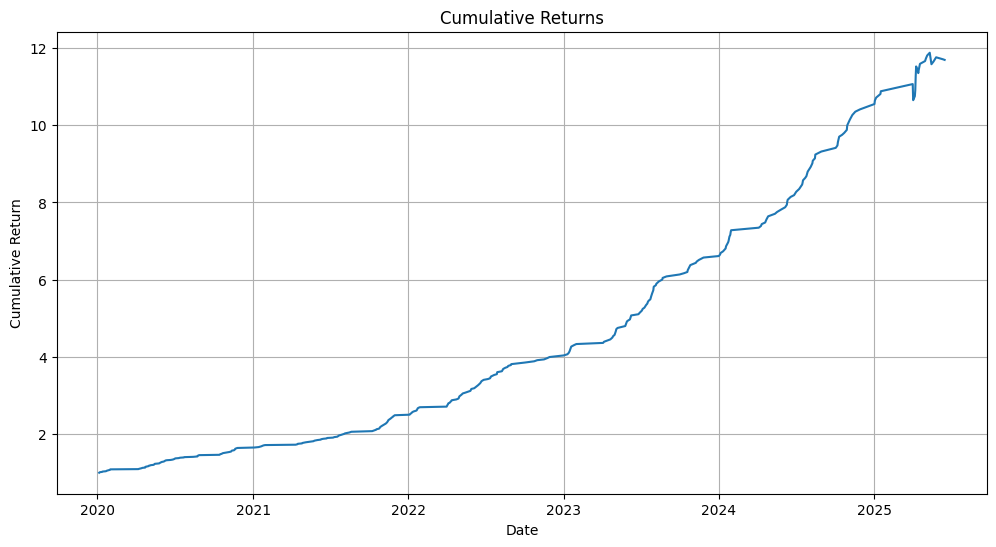

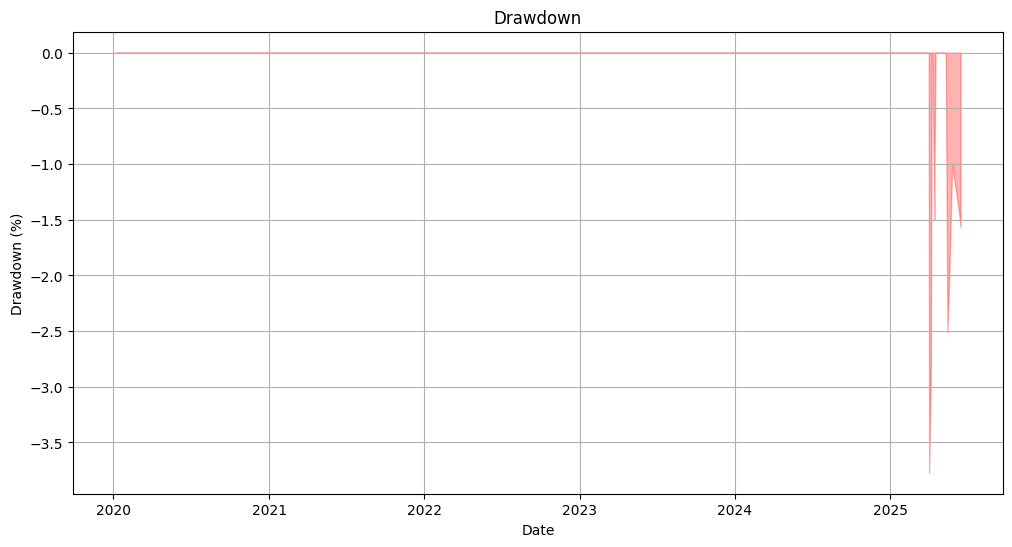

,entry_date,exit_date,duration_days,buy_pair,sell_pair,entry_buy_price,exit_buy_price,entry_sell_price,exit_sell_price,buy_profit_pct,sell_profit_pct,total_profit_pct
0,2020-01-05,2020-02-16,42,AUDUSD,EURUSD,0.69432,0.67252,1.11604,1.08411,-3.139763,3.719311,0.579548
1,2020-01-06,2020-02-13,38,AUDUSD,EURUSD,0.69364,0.67186,1.11954,1.08413,-3.139957,4.111778,0.971821
2,2020-01-08,2020-01-27,19,EURUSD,AUDUSD,1.11129,1.10193,0.68749,0.67614,-1.094944,1.650933,0.555989
3,2020-01-12,2020-01-22,10,EURUSD,AUDUSD,1.11161,1.10957,0.68996,0.68410,-0.238573,0.849325,0.610752
4,2020-01-13,2020-02-13,31,AUDUSD,EURUSD,0.68970,0.67186,1.11344,1.08413,-2.586632,3.422097,0.835465
...,...,...,...,...,...,...,...,...,...,...,...,...
310,2025-05-15,2025-06-16,32,AUDUSD,EURUSD,0.64036,0.65119,1.11918,1.15534,1.691236,-4.200218,-2.508982
311,2025-05-20,2025-05-28,8,AUDUSD,EURUSD,0.64251,0.64219,1.12881,1.12296,-0.049805,0.673718,0.623914
312,2025-05-26,2025-05-28,2,AUDUSD,EURUSD,0.64796,0.64219,1.13883,1.12296,-0.890487,1.811596,0.921109
313,2025-06-11,2025-06-16,5,AUDUSD,EURUSD,0.65083,0.65119,1.15099,1.15534,0.055314,-0.491316,-0.436002


Trade report saved to 'trade_report.csv'


In [6]:
# Define a function to calculate daily percentage changes
def calculate_daily_pct_change(data):
    # Get the daily close prices for EURUSD and AUDUSD
    eurusd_close = data['EURUSD']['Close'].resample('D').last()
    audusd_close = data['AUDUSD']['Close'].resample('D').last()
    
    # Calculate daily percentage changes
    eurusd_pct_change = eurusd_close.pct_change().dropna()
    audusd_pct_change = audusd_close.pct_change().dropna()
    
    return pd.DataFrame({
        'EURUSD_pct': eurusd_pct_change,
        'AUDUSD_pct': audusd_pct_change
    })

# Calculate daily percentage changes
daily_changes = calculate_daily_pct_change(data)

# Identify trading opportunities based on the strategy
trading_opportunities = daily_changes[
    ((daily_changes['EURUSD_pct'] > 0) & (daily_changes['AUDUSD_pct'] < 0)) | 
    ((daily_changes['EURUSD_pct'] < 0) & (daily_changes['AUDUSD_pct'] > 0))
].copy()

# Filter out trades in February, March, September, and December
excluded_months = [2, 3, 9, 12]  # Feb, Mar, Sep, Dec
trading_opportunities = trading_opportunities[~trading_opportunities.index.month.isin(excluded_months)]

# Add columns to identify which pair to buy and which to sell
trading_opportunities['buy_pair'] = np.where(
    trading_opportunities['EURUSD_pct'] < 0, 'EURUSD', 'AUDUSD'
)
trading_opportunities['sell_pair'] = np.where(
    trading_opportunities['EURUSD_pct'] > 0, 'EURUSD', 'AUDUSD'
)

# Initialize lists to store trade details
trades = []

# Process each trading opportunity
for date, row in trading_opportunities.iterrows():
    # Determine which pair to buy and which to sell
    buy_pair = row['buy_pair']
    sell_pair = row['sell_pair']
    
    # Get entry prices (using the close price of the signal day as entry for next day)
    entry_date = date
    entry_buy_price = data[buy_pair]['Close'].loc[entry_date]
    entry_sell_price = data[sell_pair]['Close'].loc[entry_date]
    
    # Determine position sizes (1.3 for EURUSD, 1 for AUDUSD)
    buy_size = 1.3 if buy_pair == 'EURUSD' else 1.0
    sell_size = 1.3 if sell_pair == 'EURUSD' else 1.0
    
    # Find exit date and prices (when combined profit reaches 0.5%)
    # Start from the next day
    next_day_idx = data.index.get_indexer([entry_date])[0] + 1
    exit_date = None
    exit_buy_price = None
    exit_sell_price = None
    
    for i in range(next_day_idx, len(data.index)):
        current_date = data.index[i]
        current_buy_price = data[buy_pair]['Close'].loc[current_date]
        current_sell_price = data[sell_pair]['Close'].loc[current_date]
        
        # Calculate profit/loss for each position
        buy_profit_pct = (current_buy_price - entry_buy_price) / entry_buy_price * 100 * buy_size
        sell_profit_pct = (entry_sell_price - current_sell_price) / entry_sell_price * 100 * sell_size
        
        total_profit_pct = buy_profit_pct + sell_profit_pct
        
        if total_profit_pct >= 0.5:
            exit_date = current_date
            exit_buy_price = current_buy_price
            exit_sell_price = current_sell_price
            break
    
    # If we didn't find an exit point, use the last available price
    if exit_date is None:
        exit_date = data.index[-1]
        exit_buy_price = data[buy_pair]['Close'].loc[exit_date]
        exit_sell_price = data[sell_pair]['Close'].loc[exit_date]
    
    # Calculate profit/loss for each position
    buy_profit_pct = (exit_buy_price - entry_buy_price) / entry_buy_price * 100 * buy_size
    sell_profit_pct = (entry_sell_price - exit_sell_price) / entry_sell_price * 100 * sell_size
    total_profit_pct = buy_profit_pct + sell_profit_pct
    
    # Store trade details
    trades.append({
        'entry_date': entry_date,
        'exit_date': exit_date,
        'buy_pair': buy_pair,
        'sell_pair': sell_pair,
        'entry_buy_price': entry_buy_price,
        'exit_buy_price': exit_buy_price,
        'entry_sell_price': entry_sell_price,
        'exit_sell_price': exit_sell_price,
        'buy_size': buy_size,
        'sell_size': sell_size,
        'buy_profit_pct': buy_profit_pct,
        'sell_profit_pct': sell_profit_pct,
        'total_profit_pct': total_profit_pct,
        'duration_days': (exit_date - entry_date).days  # Calculate trade duration in days
    })

# Convert trades list to DataFrame
trades_df = pd.DataFrame(trades)

# Calculate performance metrics
if len(trades_df) > 0:
    # Calculate total profit
    total_profit = trades_df['total_profit_pct'].sum()
    
    # Calculate average trade duration
    avg_trade_duration = trades_df['duration_days'].mean()
    
    # Calculate annual metrics
    trades_df['year'] = trades_df['entry_date'].dt.year
    trades_per_year = trades_df.groupby('year').size()
    profit_per_year = trades_df.groupby('year')['total_profit_pct'].sum()
    
    # Calculate drawdown
    cumulative_returns = (1 + trades_df['total_profit_pct'] / 100).cumprod()
    peak = cumulative_returns.expanding().max()
    drawdown = (cumulative_returns / peak - 1) * 100
    max_drawdown = drawdown.min()
    
    # Calculate Sharpe ratio correctly (assuming risk-free rate of 0%)
    # Sharpe ratio = (Mean return - Risk free rate) / Standard deviation of returns
    mean_return = trades_df['total_profit_pct'].mean()
    std_return = trades_df['total_profit_pct'].std()
    sharpe_ratio = mean_return / std_return if std_return > 0 else 0
    
    # Calculate annualized Sharpe ratio (assuming 252 trading days per year)
    avg_trades_per_year = len(trades_df) / len(trades_df['year'].unique())
    annualized_sharpe = sharpe_ratio * np.sqrt(avg_trades_per_year)
    
    # Print results
    print(f"Total number of trades: {len(trades_df)}")
    print(f"Total profit: {total_profit:.2f}%")
    print(f"Average trade duration: {avg_trade_duration:.2f} days")
    print(f"Maximum drawdown: {max_drawdown:.2f}%")
    print(f"Sharpe ratio: {sharpe_ratio:.2f}")
    print(f"Annualized Sharpe ratio: {annualized_sharpe:.2f}")
    print("\nTrades per year:")
    print(trades_per_year)
    print("\nProfit per year:")
    print(profit_per_year)
    
    # Plot cumulative returns
    plt.figure(figsize=(12, 6))
    plt.plot(trades_df['entry_date'], cumulative_returns)
    plt.title('Cumulative Returns')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.grid(True)
    plt.show()
    
    # Plot drawdown
    plt.figure(figsize=(12, 6))
    plt.fill_between(trades_df['entry_date'], drawdown, 0, color='red', alpha=0.3)
    plt.title('Drawdown')
    plt.xlabel('Date')
    plt.ylabel('Drawdown (%)')
    plt.grid(True)
    plt.show()
    
    # Display trade details
    display(trades_df[['entry_date', 'exit_date', 'duration_days', 'buy_pair', 'sell_pair', 
                      'entry_buy_price', 'exit_buy_price', 'entry_sell_price', 'exit_sell_price',
                      'buy_profit_pct', 'sell_profit_pct', 'total_profit_pct']])
    
    # Save trade report to CSV file
    trades_df.to_csv('trade_report.csv', index=False)
    print("Trade report saved to 'trade_report.csv'")
else:
    print("No trading opportunities found based on the strategy.")
